### Setup

In [2]:
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\domin\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Project.toml`
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Manifest.toml`


In [3]:
using Dragoon
using Plots
# using Dates

In [9]:
n = 15 # number of discs in the booster

initdist = findpeak1d(18.65e9,n; eps=9.35,tand=3e-5,granularity=10_000,deviation=0.3) # initial disc configuration

freqs = genFreqs(18.65e9,50e6; n=100) # optimize on these frequencies
freqsplot = genFreqs(18.65e9,500e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n,ϵ=9.35,tand=3e-5,R=0.1)  # physical properties of the booster

hist = initHist(booster,10000,freqs,ObjAnalytical); # stores measurements

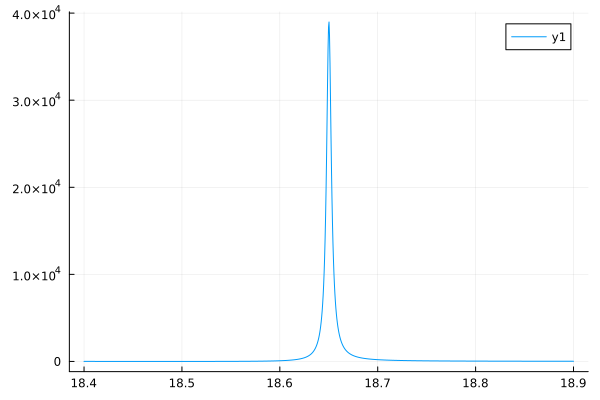

In [10]:
plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

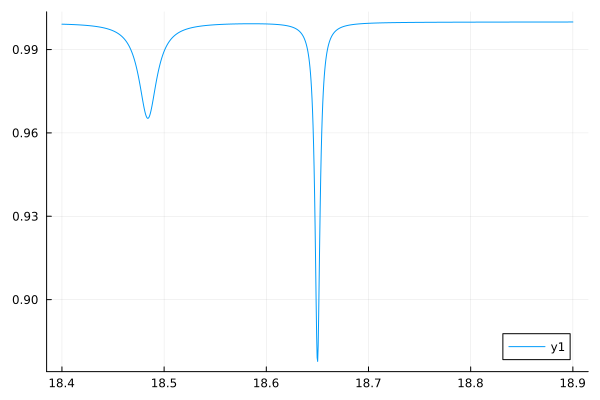

In [11]:
ref = getRef1d(booster,freqsplot)
plot(freqsplot/1e9,abs.(ref))

### Optimizer

In [12]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/booster.ndisk,0.75-1/2booster.ndisk,1-1/booster.ndisk,1e-9,
                    ObjAnalytical,
                    InitSimplexCoord(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e3),
                    showtrace=true,
                    showevery=100,
                    unstuckisiter=true);

Iter: 100, timestamp: 2 minutes, 47 seconds
Iter finished. Objective value: -1310.131

Iter: 200, timestamp: 4 minutes, 40 seconds
Iter finished. Objective value: -2082.627

Iter: 300, timestamp: 6 minutes, 8 seconds
Iter finished. Objective value: -2604.809

Iter: 400, timestamp: 7 minutes, 18 seconds
Iter finished. Objective value: -2869.576

Iter: 500, timestamp: 8 minutes, 25 seconds
Iter finished. Objective value: -3270.49

Iter: 600, timestamp: 9 minutes, 7 seconds
Iter finished. Objective value: -3284.77

Iter: 700, timestamp: 9 minutes, 29 seconds
Iter finished. Objective value: -3339.509

Iter: 800, timestamp: 9 minutes, 54 seconds
Iter finished. Objective value: -3442.608

Iter: 900, timestamp: 10 minutes, 17 seconds
Iter finished. Objective value: -3513.329

Iter: 1000, timestamp: 10 minutes, 37 seconds
Iter finished. Objective value: -3561.802

Terminated. Max iterations reached.
Final objective value: -3561.802
Elapsed movement time:  10 minutes, 37 seconds
Summed distance

In [ ]:
#obtain result, booster is now in optimized position
#pos2dist(booster.pos)     #in distance space
booster.pos               #in position space

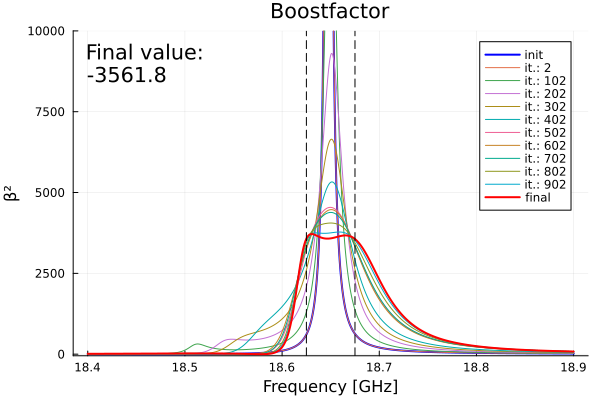

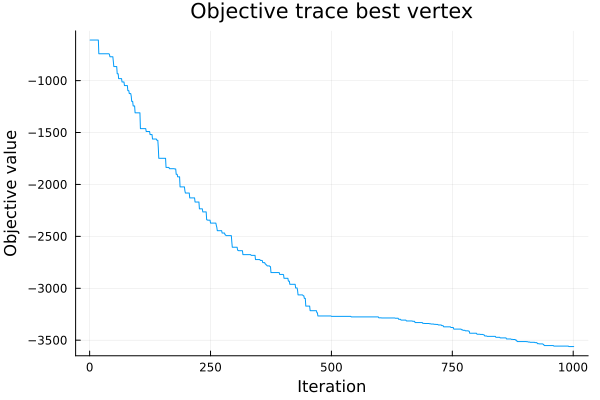

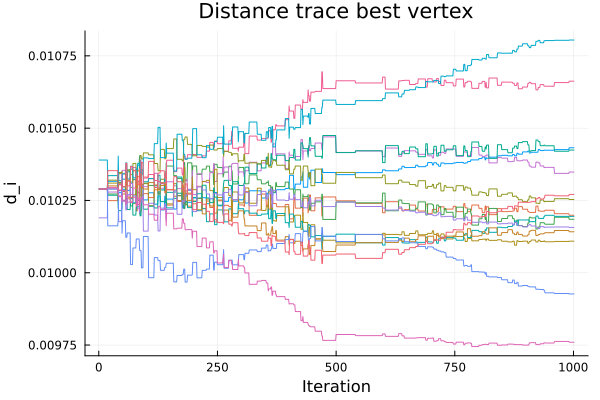

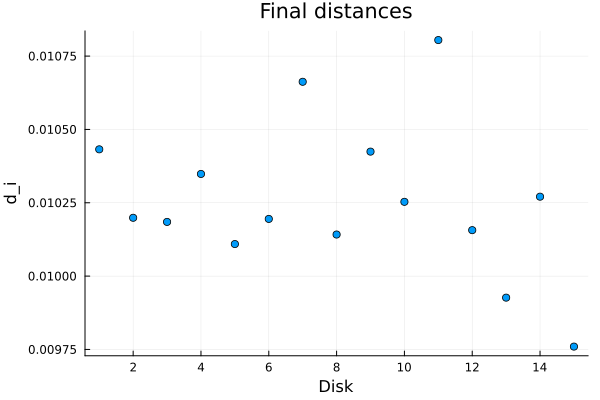

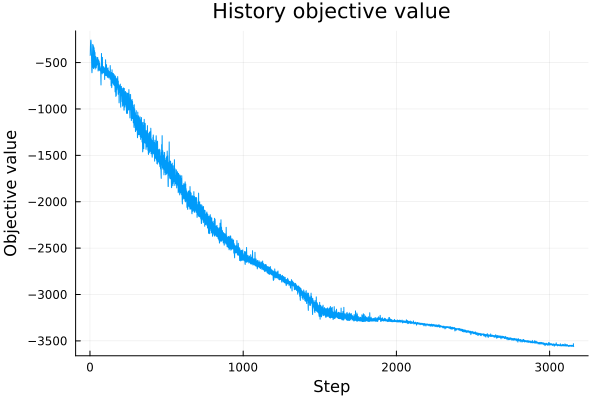

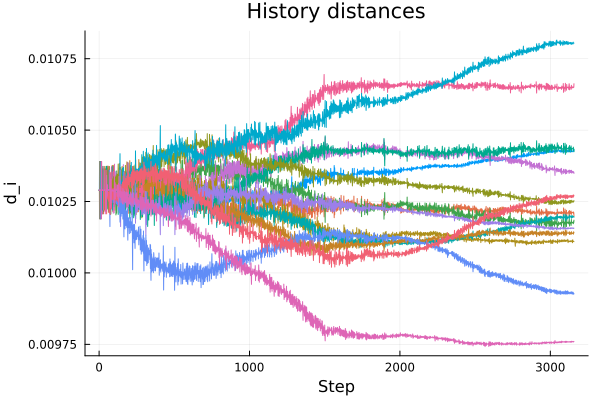

(Plot{Plots.GRBackend() n=13}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=15}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=15})

In [13]:
#get handy output
plt = analyse(booster,hist,trace,freqsplot; freqs=freqs,div=10,ylim=[-50,10000])

#savefig(plt[i],"cool_epic_result_wow.svg")

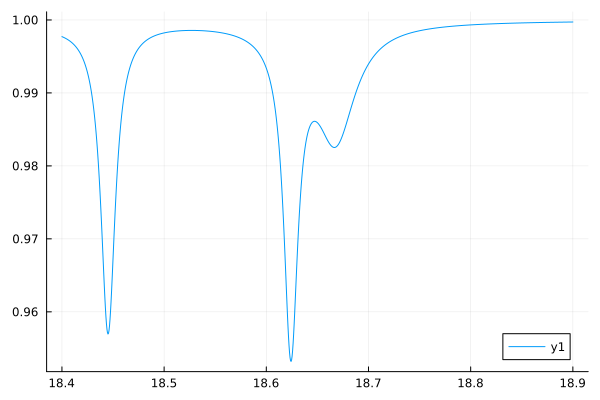

In [25]:
ref = getRef1d(booster,freqsplot)
plot(freqsplot/1e9,abs.(ref))